# Regression
We are going to predict the prices of the houses in Boston
The prices of the houses are related to 1978, and below we can see the relative kaggle competition

https://www.kaggle.com/c/boston-housing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

Using TensorFlow backend.
/Users/luigibungaro/dsr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
#Using pandas to make quick evaluation of data
df_train = pd.DataFrame(train_data)
df_targets = pd.DataFrame(train_targets)

In [4]:
print('number of data(rows):',df_train.shape[0])
print('number of features:',df_train.shape[1])
df_train.head()

number of data(rows): 404
number of features: 13


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
df_targets.head()  #1 continuous value

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


In [6]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
df_targets.describe()

,0
count,404.000000
mean,22.395050
std,9.210442
min,5.000000
25%,16.675000
50%,20.750000
75%,24.800000
max,50.000000


In [8]:
print('\n','min:',np.min(train_data, axis=0))  #result for each feature individually
print('\n','mean:',np.mean(train_data, axis=0))
print('\n','std:',np.std(train_data, axis=0)) 
print('\n','max:',np.max(train_data, axis=0)) 


 min: [6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8800e+02 1.2600e+01 3.2000e-01
 1.7300e+00]

 mean: [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]

 std: [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]

 max: [ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]


We have different scale values so we need to normalize all columns but we can't do this with the maximun value of all data. We have to do this for each column.

In [9]:
#So let's normalize the data subtracting the mean of each column and divinding also them by the standard deviation
#Calculating the man and the std for every column

mean = train_data.mean(axis=0)  #axis 0 means that it calculates the mean value for each column (13 values)
std = train_data.std(axis=0)    #if axis=1 it would calculate the mean for every row (404 values)
print(mean.shape)
print(std.shape)

(13,)
(13,)


In [10]:
#subtracting the mean of each column and divinding also them by the standard deviation

train_data -= mean   #zero centered
train_data/=std   #zero centerness and makes the numbers small

test_data -= mean
test_data /= std

#in this way the scale of the different features are more comparable because the values 
#are much more close to each other

# Defining the Neural Network Architecture

In this case, considering that we are going to create a K-fold Vaidation (apply the same model more than once), it is better to define a function that we will call for every K-fold. <br>

Metric values are recorded at the end of each epoch on the training dataset. If a validation dataset is
also provided, then the metric recorded is also calculated for the validation dataset.

All metrics are reported in verbose output and in the history object returned from calling the fit() function. In both cases, the name of the metric function is used as the key for the metric values. In the case of metrics for the validation dataset, the “val_” prefix is added to the key.

Both loss functions and explicitly defined Keras metrics can be used as training metrics.


## Keras on Regression
Below is a list of the metrics that you can use in Keras on regression problems.

Mean Squared Error: mean_squared_error, MSE or mse
Mean Absolute Error: mean_absolute_error, MAE, mae
Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
Cosine Proximity: cosine_proximity, cosine

## Keras Classification Metrics
Below is a list of the metrics that you can use in Keras on classification problems.

Binary Accuracy: binary_accuracy, acc
Categorical Accuracy: categorical_accuracy, acc
Sparse Categorical Accuracy: sparse_categorical_accuracy
Top k Categorical Accuracy: top_k_categorical_accuracy (requires you specify a k parameter)
Sparse Top k Categorical Accuracy: sparse_top_k_categorical_accuracy (requires you specify a k parameter)

ADVANCED: It is also possible to define your own metric in the backend of keras. Here a link to go deeper
https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/

In [11]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))  #input shape 13 (features)
    model.add(layers.Dense(1)) #it's a linear activation
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae']) #the optimizer uses the loss to optimize
    #in the compile we secify the metrics that we want to use to evaluate the model
    return model

test_model = build_model()
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


# K-Fold Cross Validation
It is used to prevent th
e information leak, splitting the data in different train ad tests.
In this case, having 404 samples, we can split 'automatically' the data 4 times in 4 parts where 1 of the 4 is the
validation data. We will do it as for the train and also the relative targetts data. <br>
In the for loop we'll fit also thw model, and we will append the scores, the history and the model

In [12]:
k = 4
num_val_samples = len(train_data)//k  #we have to make sure that the result is int
num_epochs = 100 # TODO: change to 100 later
all_scores=[]  #we need to collect all the scores (errors) to decide which one to use
all_histories=[]
all_models=[]
print('num_val_samples:',num_val_samples)

for i in range(k):
    print('Fold:',str(i+1))
    
    val_data = train_data[i* num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i* num_val_samples:(i+1)*num_val_samples]
    
    train_data_left = train_data[0:i* num_val_samples]
    train_data_right = train_data[(i+1)*num_val_samples:]
    partial_train_data = np.concatenate([train_data_left,train_data_right],axis=0)
    
    train_targets_left = train_targets[0:i* num_val_samples]
    train_targets_right = train_targets[(i+1)*num_val_samples:]
    partial_train_targets = np.concatenate([train_targets_left,train_targets_right],axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,
              batch_size=1,verbose=0,validation_data=(val_data,val_targets))  #verbose=1
    
    model.save(str(i+1)+'_model.h5')  #h5 is a protocol to save data 
    
    val_mse, val_mae = model.evaluate(val_data,val_targets)
    all_scores.append(val_mae)
    all_histories.append(history)
    all_models.append(model)


num_val_samples: 101
Fold: 1
101/101 [==============================] - 0s 65us/step
Fold: 2
101/101 [==============================] - 0s 51us/step
Fold: 3
101/101 [==============================] - 0s 39us/step
Fold: 4
101/101 [==============================] - 0s 43us/step


In [14]:
print('val_mae:',all_scores)

val_mae: [1.9347707139383448, 2.3211086622559196, 2.646115982886588, 2.3048277538601716]


In [20]:
#In all histories, we have all the history of the model
all_histories[0].history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [46]:
all_models[0].metrics  #how to use all_models values

['mae']

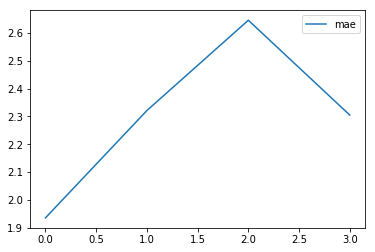

In [49]:
plt.plot(all_scores,label='mae')
plt.legend()
plt.show()
plt.close()

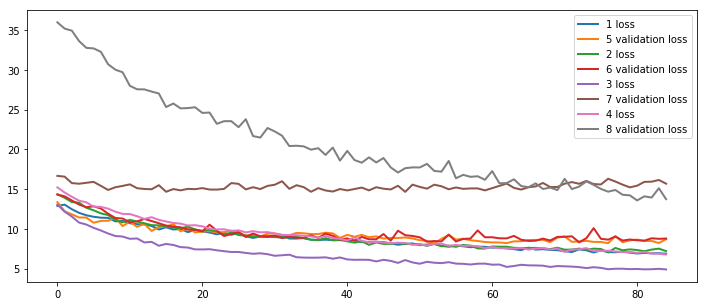

In [51]:
plt.figure(figsize=(12,5))
for i,item in enumerate(all_histories):
    i +=1
    plt.plot(item.history['loss'][15:],label='%s loss' % i,linewidth=2)
    i+=4
    plt.plot(item.history['val_loss'][15:],label='%s validation loss' % i,linewidth=2)
plt.legend()
plt.show()

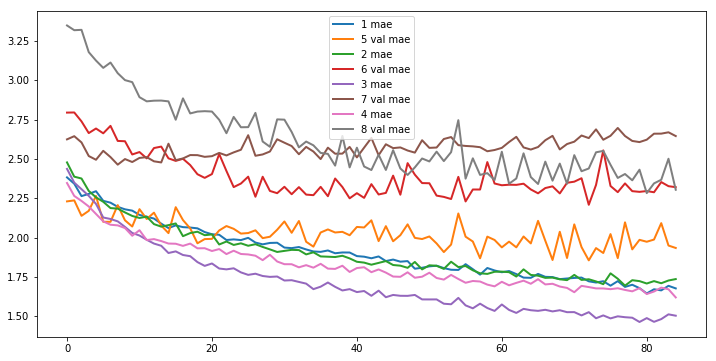

In [52]:
plt.figure(figsize=(12,6))
for i,item in enumerate(all_histories):
    i +=1
    plt.plot(item.history['mean_absolute_error'][15:],label='%s mae' % i,linewidth=2)
    i+=4
    plt.plot(item.history['val_mean_absolute_error'][15:],label='%s val mae' % i,linewidth=2)
plt.legend()
plt.show()

In [56]:
model = models.load_model('1_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [70]:
train_data[1].shape

(13,)

In [74]:
#to make prediction it is necessary to give the same input we have used in the model training
model.predict(train_data[35:39])

array([[23.011639],
       [14.279505],
       [15.134329],
       [20.061977]], dtype=float32)

## Plotting the real target vs the predicted ones

[]

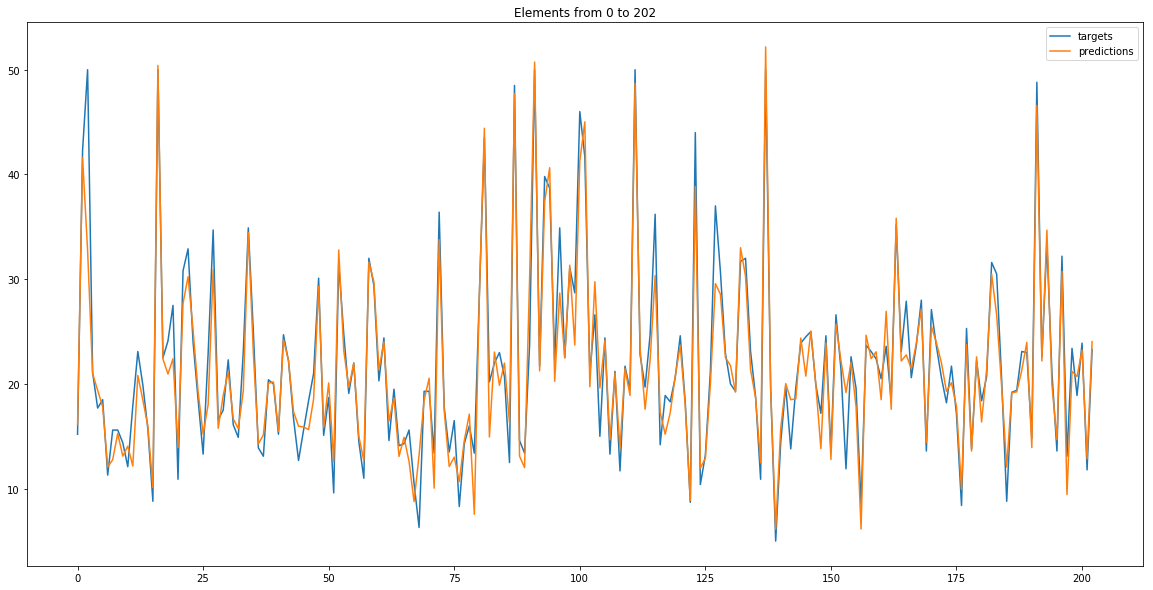

In [88]:
plt.figure(figsize=(20,10))
plt.plot(train_targets[0:203],label='targets')
plt.plot(model.predict(train_data[0:203]),label='predictions')
plt.legend()
plt.title('Elements from 0 to 202')
plt.plot()

Text(0.5,1,'Elements from 203 to 404')

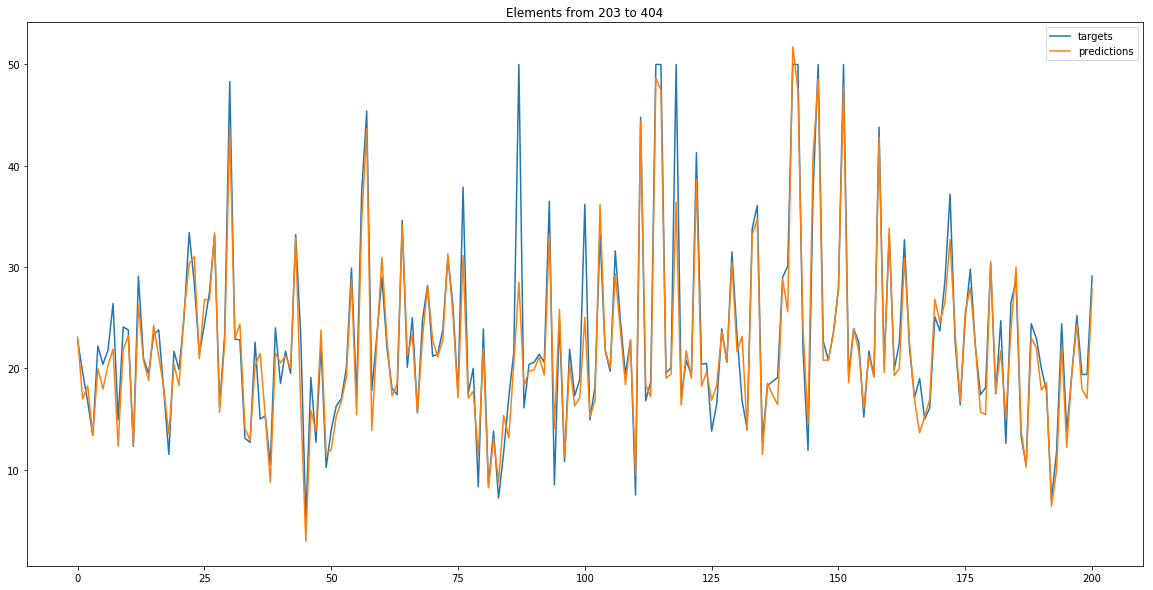

In [90]:
plt.figure(figsize=(20,10))
plt.plot(train_targets[203:],label='targets')
plt.plot(model.predict(train_data[203:]),label='predictions')
plt.legend()
plt.title('Elements from 203 to 404')
